# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) #change to 1500
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?q="
api_call = "&appid="
response_json = []
lat = []
lng = []
max_temp = []
humidity = []
cloudy = []
wind_speed = []
country = []
date = []
cities_index = []
working_cities = []

for i in range(len(cities)): 
    cities_index.append(i)
    
for i in cities_index: 
    print(f"Processing Record: {i}| {cities[i]}")
    response  = requests.get(url + str(cities[i]) + "&units=imperial" + api_call + weather_api_key).json()
    try:
        working_cities.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudy.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except (KeyError, IndexError):
        print("------>A city was just removed because some data is not available")
   



Processing Record: 0| ushuaia
Processing Record: 1| arraial do cabo
Processing Record: 2| kassala
Processing Record: 3| batsfjord
Processing Record: 4| kazalinsk
------>A city was just removed because some data is not available
Processing Record: 5| salalah
Processing Record: 6| punta arenas
Processing Record: 7| crowley
Processing Record: 8| mataura
Processing Record: 9| castro
Processing Record: 10| taolanaro
------>A city was just removed because some data is not available
Processing Record: 11| faanui
Processing Record: 12| katsuura
Processing Record: 13| esperance
Processing Record: 14| hobart
Processing Record: 15| namtsy
Processing Record: 16| chaoyang
Processing Record: 17| port alfred
Processing Record: 18| busselton
Processing Record: 19| yellowknife
Processing Record: 20| maniitsoq
Processing Record: 21| avarua
Processing Record: 22| ostrovnoy
Processing Record: 23| algodones
Processing Record: 24| broome
Processing Record: 25| tasiilaq
Processing Record: 26| evensk
Processi

Processing Record: 219| jalu
Processing Record: 220| pacific grove
Processing Record: 221| kirakira
Processing Record: 222| adrar
Processing Record: 223| high level
Processing Record: 224| artyom
Processing Record: 225| heze
Processing Record: 226| asifabad
Processing Record: 227| dwarka
Processing Record: 228| ahipara
Processing Record: 229| along
Processing Record: 230| bengkulu
Processing Record: 231| fare
Processing Record: 232| lai
Processing Record: 233| monrovia
Processing Record: 234| baiao
Processing Record: 235| amravati
Processing Record: 236| moron
Processing Record: 237| ponta do sol
Processing Record: 238| naze
Processing Record: 239| san juan
Processing Record: 240| cody
Processing Record: 241| paredon
Processing Record: 242| ilulissat
Processing Record: 243| victoria
Processing Record: 244| arman
Processing Record: 245| iberia
Processing Record: 246| port lincoln
Processing Record: 247| chokurdakh
Processing Record: 248| izhma
Processing Record: 249| saldanha
Processing

Processing Record: 434| camopi
Processing Record: 435| pemba
Processing Record: 436| deputatskiy
Processing Record: 437| shache
Processing Record: 438| havre-saint-pierre
Processing Record: 439| alamosa
Processing Record: 440| cruz
Processing Record: 441| marrakesh
Processing Record: 442| manzil salim
Processing Record: 443| saint-augustin
Processing Record: 444| yumen
Processing Record: 445| usak
Processing Record: 446| fort abbas
Processing Record: 447| mulege
Processing Record: 448| morinville
Processing Record: 449| manicore
Processing Record: 450| karratha
Processing Record: 451| chimbarongo
Processing Record: 452| lithgow
Processing Record: 453| flin flon
Processing Record: 454| aranda de duero
Processing Record: 455| puquio
Processing Record: 456| cristalina
Processing Record: 457| betioky
Processing Record: 458| kargasok
Processing Record: 459| tostamaa
------>A city was just removed because some data is not available
Processing Record: 460| bay city
Processing Record: 461| ran

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
print(len(working_cities))
print(len(lat))
print(len(lng))
print(len(max_temp))
print(len(humidity))
print(len(cloudy))
print(len(wind_speed))
print(len(country))
print(len(date))

580
580
580
580
580
580
580
580
580


In [7]:
city_dataframe = pd.DataFrame({"City"         : working_cities, 
                               "Lat"          : lat,
                               "Lng"          : lng,
                               "Max Temp"     : max_temp, 
                               "Humidity"     : humidity,
                               "Cloudiness"   : cloudy,
                               "Wind Speed"   : wind_speed,
                               "Country"      : country,
                               "Date"         : date})
city_dataframe
city_dataframe.to_csv("/Users/Vanga/Desktop/Python_API_Challenge-/city_weather_df.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(close=None, block=None)>

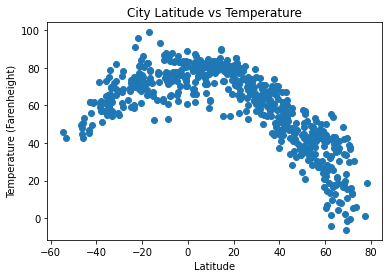

In [10]:
Lat_Temp = plt.scatter(city_dataframe["Lat"], city_dataframe["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Temperature (Farenheight)")
plt.title("City Latitude vs Temperature")
plt.savefig("Lat_vs_Temp.png")
plt.show

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(close=None, block=None)>

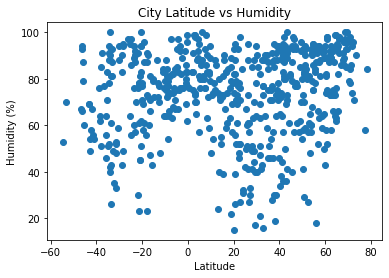

In [11]:
Lat_Hum = plt.scatter(city_dataframe["Lat"], city_dataframe["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.savefig("Lat_vs_Humidity.png")
plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

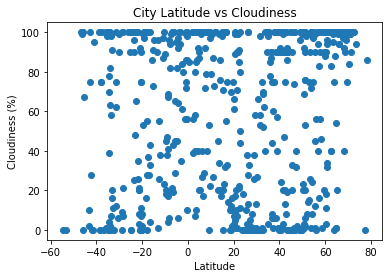

In [12]:
Lat_Cloud = plt.scatter(city_dataframe["Lat"], city_dataframe["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.savefig("Lat_vs_Cloudiness.png")
plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(close=None, block=None)>

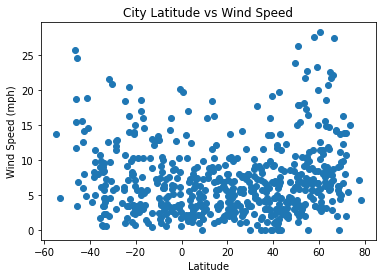

In [13]:
Lat_Hum = plt.scatter(city_dataframe["Lat"], city_dataframe["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed")
plt.savefig("Lat_vs_Speed.png")
plt.show

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.88
y = -0.95x + 90.51


<function matplotlib.pyplot.show(close=None, block=None)>

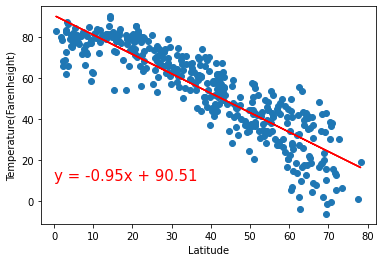

In [14]:
North = city_dataframe.loc[(city_dataframe["Lat"]>0)]
North_lat = North["Lat"]
North_temp = North["Max Temp"]
plt.scatter(North_lat, North_temp)
plt.xlabel("Latitude")
plt.ylabel("Temperature(Farenheight)")


correlation = st.pearsonr(North_lat, North_temp)
(slope, intercept, rvalue, pvalue, stderr) = linregress(North_lat, North_temp)
regress_values = North_lat * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.plot(North_lat, regress_values,"r-")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(line_eq)

plt.savefig("North_Lat_vs_Temp.png")
plt.show


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.65
y = 0.52x + 80.95


<function matplotlib.pyplot.show(close=None, block=None)>

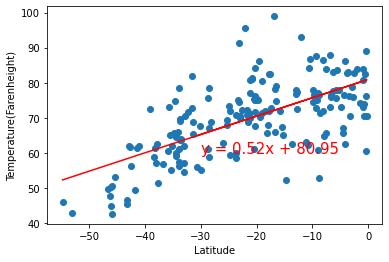

In [15]:
South = city_dataframe.loc[(city_dataframe["Lat"]<0)]
South_lat = South["Lat"]
South_temp = South["Max Temp"]
plt.scatter(South_lat, South_temp)
plt.xlabel("Latitude")
plt.ylabel("Temperature(Farenheight)")

correlation = st.pearsonr(South_lat, South_temp)
(slope, intercept, rvalue, pvalue, stderr) = linregress(South_lat, South_temp)
regress_values = South_lat * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.plot(South_lat, regress_values,"r-")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(line_eq)

plt.savefig("SouthLat_vs_Temp.png")
plt.show

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.19
y = 0.19x + 67.18


<function matplotlib.pyplot.show(close=None, block=None)>

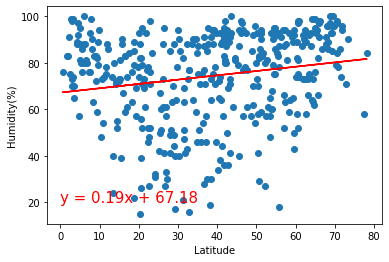

In [16]:
North_hum = North["Humidity"]
plt.scatter(North_lat, North_hum)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

correlation = st.pearsonr(North_lat, North_hum)
(slope, intercept, rvalue, pvalue, stderr) = linregress(North_lat, North_hum)
regress_values = North_lat * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.plot(North_lat, regress_values,"r-")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(line_eq)

plt.savefig("NorthLat_vs_Humidity.png")
plt.show

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.23
y = 0.29x + 79.34


<function matplotlib.pyplot.show(close=None, block=None)>

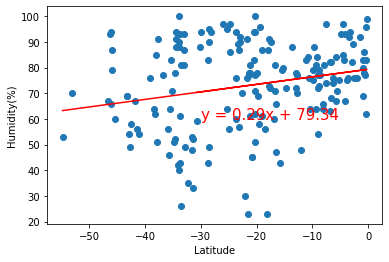

In [17]:
South_hum = South["Humidity"]
plt.scatter(South_lat, South_hum)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

correlation = st.pearsonr(South_lat, South_hum)
(slope, intercept, rvalue, pvalue, stderr) = linregress(South_lat, South_hum)
regress_values = South_lat * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.plot(South_lat, regress_values,"r-")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(line_eq)

plt.savefig("SouthLat_vs_Humidity.png")
plt.show

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.19
y = 0.38x + 45.07


<function matplotlib.pyplot.show(close=None, block=None)>

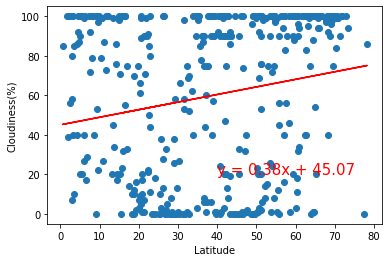

In [18]:
North_cloud = North["Cloudiness"]
plt.scatter(North_lat, North_cloud)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

correlation = st.pearsonr(North_lat, North_cloud)
(slope, intercept, rvalue, pvalue, stderr) = linregress(North_lat, North_cloud)
regress_values = North_lat * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.plot(North_lat, regress_values,"r-")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(line_eq)
plt.savefig("NorthLat_vs_Cloudiness.png")
plt.show

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.15
y = 0.45x + 65.64


<function matplotlib.pyplot.show(close=None, block=None)>

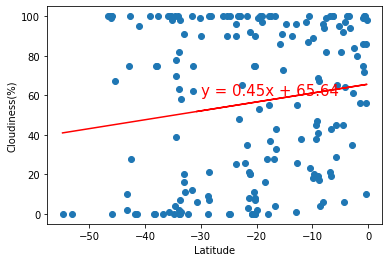

In [19]:
South_cloud = South["Cloudiness"]
plt.scatter(South_lat, South_cloud)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

correlation = st.pearsonr(South_lat, South_cloud)
(slope, intercept, rvalue, pvalue, stderr) = linregress(South_lat, South_cloud)
regress_values = South_lat * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.plot(South_lat, regress_values,"r-")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(line_eq)
plt.savefig("SouthLat_vs_Cloudiness.png")
plt.show

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.27
y = 0.07x + 4.35


<function matplotlib.pyplot.show(close=None, block=None)>

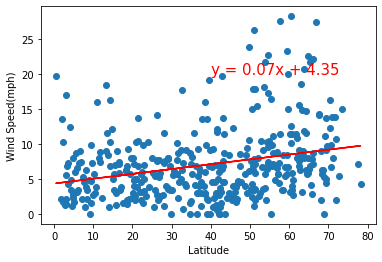

In [20]:
North_speed = North["Wind Speed"]
plt.scatter(North_lat, North_speed)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

correlation = st.pearsonr(North_lat, North_speed)
(slope, intercept, rvalue, pvalue, stderr) = linregress(North_lat, North_speed)
regress_values = North_lat * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.plot(North_lat, regress_values,"r-")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(line_eq)
plt.savefig("NorthLat_vs_Speed.png")
plt.show

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.25
y = -0.1x + 5.47


<function matplotlib.pyplot.show(close=None, block=None)>

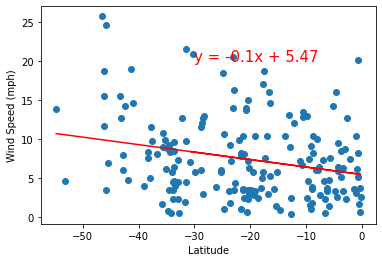

In [21]:
South_speed = South["Wind Speed"]
plt.scatter(South_lat, South_speed)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

correlation = st.pearsonr(South_lat, South_speed)
(slope, intercept, rvalue, pvalue, stderr) = linregress(South_lat, South_speed)
regress_values = South_lat * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.plot(South_lat, regress_values,"r-")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(line_eq)
plt.savefig("SouthLat_vs_Speed.png")
plt.show